Примерный план выполнения проекта:

* Представьте массив текстов в виде векторов (как с помощью TF-IDF, так и с помощью Word2Vec).
* Выберите расстояние, с помощью которого вы будете оценивать близость векторов, представляющих тексты (рекомендуется использовать косинусное расстояние, но вы можете попробовать и другие подходы).
* Для полученных векторов попарно найдите косинусное расстояние (попробуйте сделать это без цикла, с помощью матричных операций).
* Задайте какой-то порог значимости (с которым вы сравните значения расстояния между векторами), на основе которого вы будете судить о том, похожи два текста или нет.

Критерии оценивания проекта:
* общее качество кода и следование PEP-8;
* корректное использование Word2Vec и tf-idf для формирования пространства признаков.


In [2]:
import pandas as pd
df = pd.read_csv('./data/sample-data.csv')
df.drop(['id'], axis=1)

,description
0,Active classic boxers - There's a reason why o...
1,Active sport boxer briefs - Skinning up Glory ...
2,Active sport briefs - These superbreathable no...
3,"Alpine guide pants - Skin in, climb ice, switc..."
4,"Alpine wind jkt - On high ridges, steep ice an..."
...,...
495,Cap 2 bottoms - Cut loose from the maddening c...
496,Cap 2 crew - This crew takes the edge off fick...
497,All-time shell - No need to use that morning T...
498,All-wear cargo shorts - All-Wear Cargo Shorts ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   description  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


In [4]:
#Представьте массив текстов в виде векторов
# (как с помощью TF-IDF, 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', binary=True, max_features=25_000)
TFIDF_text_embeddings = tfidf.fit_transform( df['description'] ).toarray()

In [5]:
TFIDF_text_embeddings.shape

(500, 4600)

In [6]:
print((TFIDF_text_embeddings > 0.0).sum())

38108


In [15]:
# import gensim.downloader
# print(list(gensim.downloader.info()['models'].keys()))

In [29]:
#так и с помощью Word2Vec)
import gensim
import gensim.downloader
import nltk
import numpy


embeddings = gensim.downloader.load('word2vec-google-news-300')
# nltk.download('stopwords')


docs_vectors = pd.DataFrame()
stopwords = nltk.corpus.stopwords.words('english')
for doc in df['description'].str.lower().str.replace('[a-z]', ''):
    temp = pd.DataFrame()
    for word in doc.split(' '):
        if word not in stopwords:
            try:
                word_vec = embeddings[word]
                temp = temp.append(pd.Series(word_vec), ignore_index = True)
            except:
                pass
    doc_vector = temp.mean()
    docs_vectors = docs_vectors.append(doc_vector, ignore_index = True)
docs_vectors.shape

W2V_text_embeddings = numpy.asarray(docs_vectors.values)
W2V_text_embeddings = numpy.nan_to_num(W2V_text_embeddings)

/tmp/ipykernel_22180/3960838853.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  for doc in df['description'].str.lower().str.replace('[a-z]', ''):


In [31]:
W2V_text_embeddings.shape

(500, 300)

In [32]:
print((W2V_text_embeddings > 0.0).sum())

25506


In [ ]:
# Для полученных векторов попарно найдите косинусное расстояние (попробуйте сделать это без цикла, с помощью матричных операций)

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
TFIDF_cs_matrix = cosine_similarity(TFIDF_text_embeddings, TFIDF_text_embeddings)
W2V_cs_matrix = cosine_similarity(W2V_text_embeddings, W2V_text_embeddings)

In [34]:
TFIDF_cs_matrix

array([[1.        , 0.18652085, 0.11989642, ..., 0.04386885, 0.09243105,
        0.07568186],
       [0.18652085, 1.        , 0.43452928, ..., 0.0407376 , 0.12165498,
        0.05534363],
       [0.11989642, 0.43452928, 1.        , ..., 0.02476351, 0.05161329,
        0.03228341],
       ...,
       [0.04386885, 0.0407376 , 0.02476351, ..., 1.        , 0.04610441,
        0.0454197 ],
       [0.09243105, 0.12165498, 0.05161329, ..., 0.04610441, 1.        ,
        0.31195031],
       [0.07568186, 0.05534363, 0.03228341, ..., 0.0454197 , 0.31195031,
        1.        ]])

In [35]:
W2V_cs_matrix

array([[1.0000001 , 0.        , 0.        , ..., 0.9567705 , 0.        ,
        0.90217793],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9567705 , 0.        , 0.        , ..., 1.0000005 , 0.        ,
        0.8348755 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.90217793, 0.        , 0.        , ..., 0.8348755 , 0.        ,
        1.0000005 ]], dtype=float32)

In [51]:
# Задайте какой-то порог значимости (с которым вы сравните значения расстояния между векторами),
# на основе которого вы будете судить о том, похожи два текста или нет

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

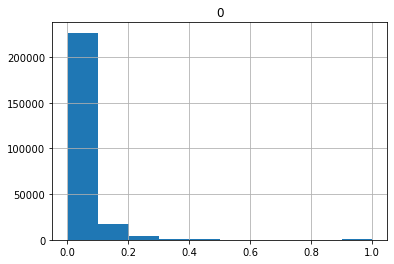

In [50]:
val = pd.DataFrame(np.reshape(TFIDF_cs_matrix, -1))
val.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

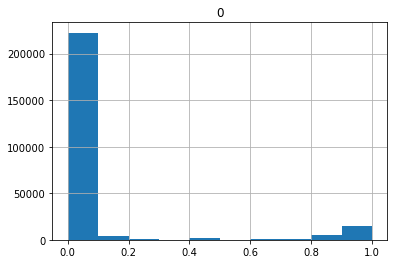

In [52]:
val = pd.DataFrame(np.reshape(W2V_cs_matrix, -1))
val.hist()

Из гистограмм распределения видно, что похожими можно считать тексты с cosine_similarity в интервале (0.8, 1) 